In [8]:
import numpy as np
import corner
import matplotlib.pyplot as plt

In [9]:
ordering = 'N'
learn_target = '3flavor_clean' #3flavor_clean, 3flavor_poisson, nsi_clean, nsi_poisson
path = './{}O_contour/'.format(ordering) + learn_target
nf = np.load(path + '/nf.npz')
cvae = np.load(path + '/cvae.npz')
bnn = np.load(path + '/bnn.npz')

nf_arr = nf['arr_0']
cvae_arr = cvae['arr_0']
bnn_arr = bnn['arr_0']

if 'poisson' in learn_target:
    dnn = np.load(path + '/dnn.npz')
    dnn_arr = dnn['arr_0']

In [10]:
if learn_target == '3flavor_poisson':
    file = open('../../Data/one_sigma_contour_DUNE_{}O.dat'.format(ordering))
    theta23, delta, chi = [], [], []

    while True:
        array = [float(string) for string in file.readline().split()]
        if(len(array)>0):
            theta23.append(array[0])
            delta.append(array[1]) 
            chi.append(array[2])
        else:
            break
    file.close()

    theta23, delta, chi = np.array(theta23),  np.array(delta), np.array(chi)
    a = min(theta23)*100-300
    b = max(theta23)*100 + 300
    c = min(delta)*10-60
    d = max(delta)*10+60
    x = np.linspace(int(a), int(b), int((b - a) + 1))/100
    y = np.linspace(int(c), int(d), int(d - c + 1))/10
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((len(X),len(X[0])))
    for i in np.arange(len(theta23)):
        Z[np.where(Y == delta[i])[0][0]][np.where(X == theta23[i])[1][0]] = 1

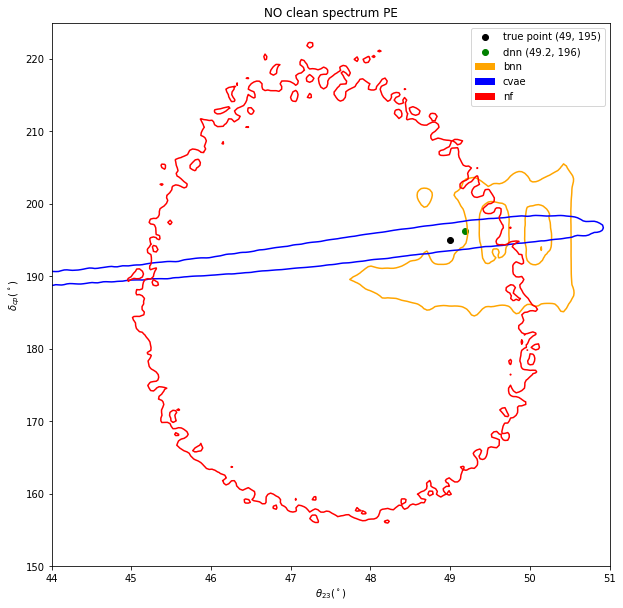

In [11]:
plt.figure(figsize=(10,10))

#Choose the range to observe.
if ordering =='N': range = [[44,51], [150, 225]]
else: range = [[44,51], [250, 350]]

#Draw BNN contour.
bnn_delta = np.angle(bnn_arr[:, 2] + 1j*bnn_arr[:, 3], deg=True)
bnn_delta = np.where(bnn_delta > 0 , bnn_delta, bnn_delta+360)
corner.hist2d(bnn_arr[:, 1]*180/np.pi, bnn_delta,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='orange',
                    labels= ["$\\theta_{23} $($^\circ$)", "$\delta_{cp} $($^\circ$)"],
                    range=range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={"fontsize": 30},
                    smooth=True
                   )

#Draw cVAE contour.
cvae_delta = np.angle(cvae_arr[:, 2] + 1j*cvae_arr[:, 3], deg=True)
cvae_delta = np.where(cvae_delta > 0 , cvae_delta, cvae_delta+360)
corner.hist2d(cvae_arr[:, 1]*180/np.pi, cvae_delta,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='blue',
                    labels= ["$\\theta_{23} $($^\circ$)", "$\delta_{cp} $($^\circ$)"],
                    range=range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={"fontsize": 30},
                    smooth=True
                   )

#Draw nf contour.
nf_delta = np.angle(nf_arr[:, 2] + 1j*nf_arr[:, 3], deg=True)
nf_delta = np.where(nf_delta > 0 , nf_delta, nf_delta+360)
corner.hist2d(nf_arr[:, 1]*180/np.pi, nf_delta,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='red',
                    labels= ["$\\theta_{23} $($^\circ$)", "$\delta_{cp} $($^\circ$)"],
                    range=range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={"fontsize": 30},
                    smooth=True
                   )

#If 3flavor_poisson, draw DNN and Chi2 contour.
if 'clean' in learn_target:
    proxy = [plt.Rectangle((2, 2), 0.0, 3, 90, fc=c) for c in ['orange', 'blue', 'red']]
    if ordering == 'N':
        true_point = plt.scatter(49, 195, label = "true point", c='k')
        dnn_prediction = plt.scatter(49.188957, 196.26898, c='green')
        plt.legend([true_point, dnn_prediction] + proxy,
                ["true point (49, 195)", "dnn (49.2, 196)", "bnn", "cvae", "nf"])
    else:
        true_point = plt.scatter(49.3, 286., label = "true point", c='k')
        dnn_prediction = plt.scatter(49.09027, 283.9852, c='green')
        plt.legend([true_point, dnn_prediction] + proxy,
                ["true point (49.3, 286)", "dnn (49.1, 284)", "bnn", "cvae", "nf"])

else:
    dnn_delta = np.angle(dnn_arr[:, 2] + 1j*dnn_arr[:, 3], deg=True)
    dnn_delta = np.where(dnn_delta > 0 , dnn_delta, dnn_delta+360)
    corner.hist2d(dnn_arr[:, 1]*180/np.pi, dnn_delta,
                        levels=(0.68,),
                        scale_hist=True,
                        plot_datapoints=False,
                        color='green',
                        labels= ["$\\theta_{23} $($^\circ$)", "$\delta_{cp} $($^\circ$)"],
                        range=range,
                        plot_contours = True,
                        plot_density = False,
                        fontsize=30,
                        bins = [200, 200],
                        label_kwargs={"fontsize": 30},
                        smooth=True
                    )
    
    plt.contour(X, Y, Z, 0, colors='darkmagenta', linestyles="-", linewidths=1)
    proxy = [plt.Rectangle((2, 2), 0.0, 3, 90, fc=c) for c in ['green', 'orange', 'blue', 'red', 'darkmagenta']]
    if ordering == 'N':
        true_point = plt.scatter(49, 195, label = "true point", c='k')
        plt.legend([true_point] + proxy,
                ["true point (49, 195)", "dnn", "bnn", "cvae", "nf", "chi2"])
    else:
        true_point = plt.scatter(49.3, 286., label = "true point", c='k')
        plt.legend([true_point] + proxy,
                ["true point (49.3, 286)", "dnn", "bnn", "cvae", "nf",  "chi2"])

if learn_target == '3flavor_clean': plt.title("{}O clean spectrum PE".format(ordering))
elif learn_target == '3flavor_poisson': plt.title("{}O poisson spectrum PE".format(ordering))
else: pass

plt.xlabel('$\\theta_{23} $($^\circ$)')
plt.ylabel('$\delta_{cp} $($^\circ$)')
if learn_target == '3flavor_clean': plt.savefig("contour_picture/{}O clean spectrum PE".format(ordering))
elif learn_target == '3flavor_poisson': plt.savefig("contour_picture/{}O poisson spectrum PE".format(ordering))
plt.show()